In [1]:
import numpy as np

import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras import layers, models,callbacks
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from tensorflow.keras import layers, models, callbacks
from sklearn.ensemble import RandomForestClassifier


In [3]:
def load_mfcc_files(directory):
    mfcc_data = []
    for file in os.listdir(directory):
            print(file)
            file_path = os.path.join(directory, file)
            data = pd.read_csv(file_path, header=None).values
            mfcc_data.append(data)
            print(data.shape)
    return mfcc_data

# Load MFCC data
asha = load_mfcc_files(r"C:\Users\kani1\OneDrive\Documents\DS203 Programing for Data Science\project\mfcc_train_proccessed\Asha Bhosle")
bhavgeet = load_mfcc_files(r"C:\Users\kani1\OneDrive\Documents\DS203 Programing for Data Science\project\mfcc_train_proccessed\Bhavgeet")
kishor = load_mfcc_files(r"C:\Users\kani1\OneDrive\Documents\DS203 Programing for Data Science\project\mfcc_train_proccessed\Kishor Kumar")
lavni = load_mfcc_files(r"C:\Users\kani1\OneDrive\Documents\DS203 Programing for Data Science\project\mfcc_train_proccessed\Lavni")
michael = load_mfcc_files(r"C:\Users\kani1\OneDrive\Documents\DS203 Programing for Data Science\project\mfcc_train_proccessed\Michael Jackson")
national = load_mfcc_files(r"C:\Users\kani1\OneDrive\Documents\DS203 Programing for Data Science\project\mfcc_train_proccessed\National Anthem")

# Debug: Print the number of files loaded from each directory
print(f"Asha Bhosle: {len(asha)} files")
print(f"Bhavgeet: {len(bhavgeet)} files")
print(f"Kishor Kumar: {len(kishor)} files")
print(f"Lavni: {len(lavni)} files")
print(f"Michael Jackson: {len(michael)} files")
print(f"National Anthem: {len(national)} files")

Aaiye Meharban - Howrah Bridge 1958 128 Kbps_MFCC.csv
(20, 25000)
Aaja Aaja - Yeh Raaste Hain Pyaar Ke 128 Kbps_MFCC.csv
(20, 25000)
Aao Huzoor Tumko - Kismet 128 Kbps_MFCC.csv
(20, 25000)
Aasmaa - Saand Ki Aankh 128 Kbps_MFCC.csv
(20, 25000)
Aise Jalta Hai Jiya - 1920 128 Kbps_MFCC.csv
(20, 25000)
Allahu - Dev 128 Kbps_MFCC.csv
(20, 25000)
Andhere - 31st October 128 Kbps_MFCC.csv
(20, 25000)
Ankh Milaoongi - Fiza 128 Kbps_MFCC.csv
(20, 25000)
Baila Baila - Khwahish 128 Kbps_MFCC.csv
(20, 25000)
Bhanwara Bada Nadan Asha Bhosle - Sahib Bibi Aur Ghulam 128 Kbps_MFCC.csv
(20, 25000)
bollywood_MKS 1978 - O Saathi Re Tere Bina-Female_MFCC.csv
(20, 25000)
bollywood_MS 1966 - Jhumka Gira Re_MFCC.csv
(20, 25000)
bollywood_Rangeela 1995 - Tanha Tanha Yahan Pe_MFCC.csv
(20, 25000)
bollywood_STK 1982 - Kitne Bhi Tu(Female)_MFCC.csv
(20, 25000)
bollywood_UJ 1981 - Dil Cheez Kya Hai_MFCC.csv
(20, 25000)
bollywood_UJ 1981 - In Aankhon Ki Masti Ke_MFCC.csv
(20, 25000)
Chain Aapko Mila - Footpath 128 

In [4]:
#repeat songs

asha = np.array(asha,dtype='float32')
bhavgeet = np.array(bhavgeet,dtype='float32')
kishor=np.array(kishor,dtype='float32')
lavni=np.array(lavni,dtype='float32')
michael=np.array(michael,dtype='float32')
national=np.array(national,dtype='float32')
print(asha.shape)
print(bhavgeet.shape)
print(kishor.shape)
print(lavni.shape)
print(michael.shape)
print(national.shape)

asha=asha[:-1]
bhavgeet = bhavgeet[:-1]
kishor=kishor[:-1]
lavni=lavni[:-3]

michael=michael[:-1]
print("new")
print(asha.shape)
print(bhavgeet.shape)
print(kishor.shape)
print(lavni.shape)
print(michael.shape)
print(national.shape)


(50, 20, 25000)
(50, 20, 25000)
(50, 20, 25000)
(52, 20, 25000)
(50, 20, 25000)
(49, 20, 25000)
new
(49, 20, 25000)
(49, 20, 25000)
(49, 20, 25000)
(49, 20, 25000)
(49, 20, 25000)
(49, 20, 25000)


In [5]:

# Combine data
data = np.concatenate((asha, bhavgeet, kishor, lavni, michael, national), axis=0)

# Create labels
labels = ['asha'] * len(asha) + ['bhavgeet'] * len(bhavgeet) + ['kishor'] * len(kishor) + ['lavni'] * len(lavni) + ['michael'] * len(michael) + ['national'] * len(national)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Combine data and labels into a single array
combined_data = np.empty((data.shape[0], data.shape[1], data.shape[2] + 1), dtype=object)
combined_data[:, :, :-1] = data
combined_data[:, 0, -1] = encoded_labels  # Add labels in the last column

# Check the shape of the combined data
print(f"Combined data shape: {combined_data.shape}")

#The shape of combined_data will be (294, 20, 25001), where the last element in the innermost dimension contains the encoded labels.

Combined data shape: (294, 20, 25001)


In [6]:
# Extract the data without the labels
X = combined_data[:, :, :-1]

# Extract the labels
y = combined_data[:, 0, -1]

# Print the shapes of X and y to verify
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
X = X.astype(np.float32)
y = y.astype(np.int32)
print(y)


X shape: (294, 20, 25000)
y shape: (294,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [7]:

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)

# Print the encoded labels to verify
print(f"Encoded labels: {encoded_y}")

Encoded labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [8]:

# Step 1: Split the dataset into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

# Step 2: Split the training set into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(x_val[:1])
print(x_val[:1].shape)


(176, 20, 25000)
(59, 20, 25000)
(59, 20, 25000)
[[[-469.76727 -469.76727 -469.76727 ...    0.         0.         0.     ]
  [   0.         0.         0.      ...    0.         0.         0.     ]
  [   0.         0.         0.      ...    0.         0.         0.     ]
  ...
  [   0.         0.         0.      ...    0.         0.         0.     ]
  [   0.         0.         0.      ...    0.         0.         0.     ]
  [   0.         0.         0.      ...    0.         0.         0.     ]]]
(1, 20, 25000)


In [10]:


# Assuming x_train, x_val, x_test, y_train, y_val, y_test are already defined
# and have the shape (176, 20, 25000)

# Build the CNN model for feature extraction
def build_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 8, activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))
    
    

    #model.add(layers.Conv1D(64, 5, activation='relu', padding='same'))
    #model.add(layers.BatchNormalization())
    #model.add(layers.MaxPooling1D(2, padding='same'))
    #model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv1D(128, 5, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(6, activation='softmax'))  # Assuming 6 classes for classification
    return model

input_shape = (20, 25000)  # Adjusted to match the input data shape
cnn_model = build_cnn_model(input_shape)

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape the data to match the input shape of the model
x_train = x_train.reshape(-1, 20, 25000)
x_val = x_val.reshape(-1, 20, 25000)
x_test = x_test.reshape(-1, 20, 25000)

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
# Train the CNN model with early stopping
cnn_model.fit(x_train, y_train, epochs=200, batch_size=16, validation_data=(x_val, y_val), callbacks=[early_stopping,lr_scheduler])


# Assuming X_test and y_test are your test data and labels
X_test = x_test.astype(np.float32)
y_test = y_test.astype(np.int32)  # Ensure y_test is integer type for sparse_categorical_crossentropy

# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, batch_size=32)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")
cnn_model.summary()

# Predict the labels for the test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels if necessary

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print detailed classification report
print(classification_report(y_test, y_pred_classes))


Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.1877 - loss: 2.7799 - val_accuracy: 0.3729 - val_loss: 3.3723 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.3083 - loss: 2.0050 - val_accuracy: 0.3390 - val_loss: 3.5077 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.3818 - loss: 1.7088 - val_accuracy: 0.3220 - val_loss: 3.4101 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.4031 - loss: 1.6696 - val_accuracy: 0.3220 - val_loss: 3.2721 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.4327 - loss: 1.6728 - val_accuracy: 0.3390 - val_loss: 2.8024 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.3797 - loss: 1.7198 - val_accuracy: 0.3559 - val_loss: 2.3643 - learning_rate: 0.0010
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5452 - loss: 1.2830

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 20, 32)         │     6,400,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 128)        │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,512,692 (74.44 MB)

 Trainable params: 6,504,038 (24.81 MB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 13,008,078 (49.62 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Accuracy: 0.711864406779661
Precision: 0.7271492631662123
Recall: 0.711864406779661
F1 Score: 0.6939783873833443
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.88      0.64      0.74        11
           2       0.91      1.00      0.95        10
           3       0.38      0.71      0.50         7
           4       0.50      0.12      0.20         8
           5       0.92      1.00      0.96        12

    accuracy                           0.71        59
   macro avg       0.70      0.69      0.66        59
weighted avg       0.73      0.71      0.69        59



roc curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming X_test and y_test are your test data and labels
X_test = x_test.astype(np.float32)
y_test = y_test.astype(np.int32)  # Ensure y_test is integer type for sparse_categorical_crossentropy

# Predict the probabilities for the test set
y_pred_prob = cnn_model.predict(X_test)

# Binarize the output labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(20, 15), dpi=1000)  # Increase figure size and DPI
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,  # Increase line width
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)  # Add grid
plt.show()

# Print the AUC values for each class
for i in range(n_classes):
    print(f"AUC for class {i}: {roc_auc[i]:.2f}")

# Compute and print the micro-average AUC
print(f"Micro-average AUC: {roc_auc['micro']:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


KeyboardInterrupt: 

visualizing filters of cnn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Visualizing filters for layer: conv1d_1


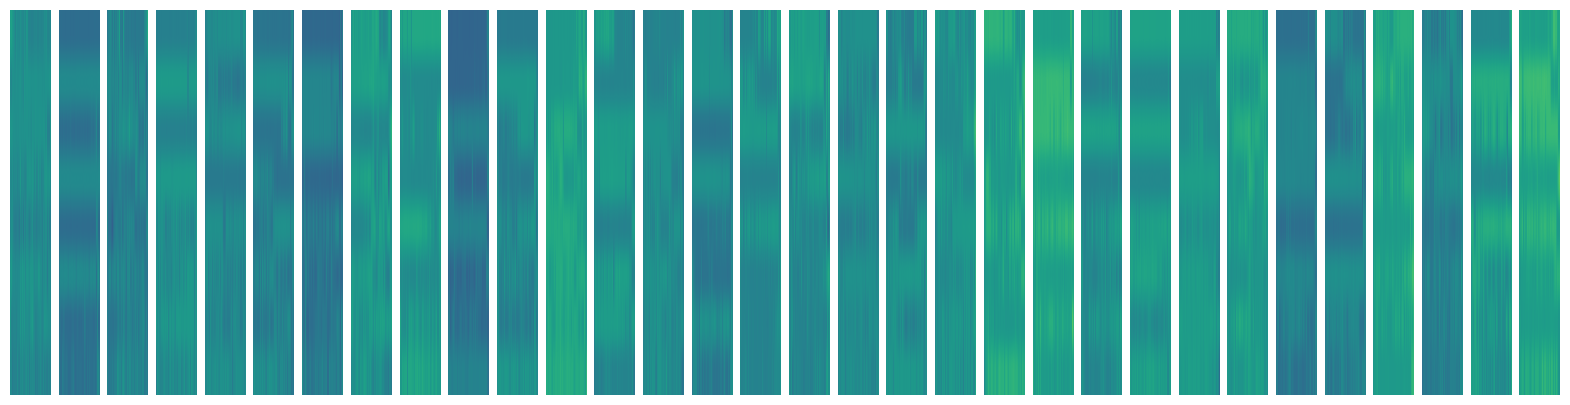

Visualizing filters for layer: conv1d_2


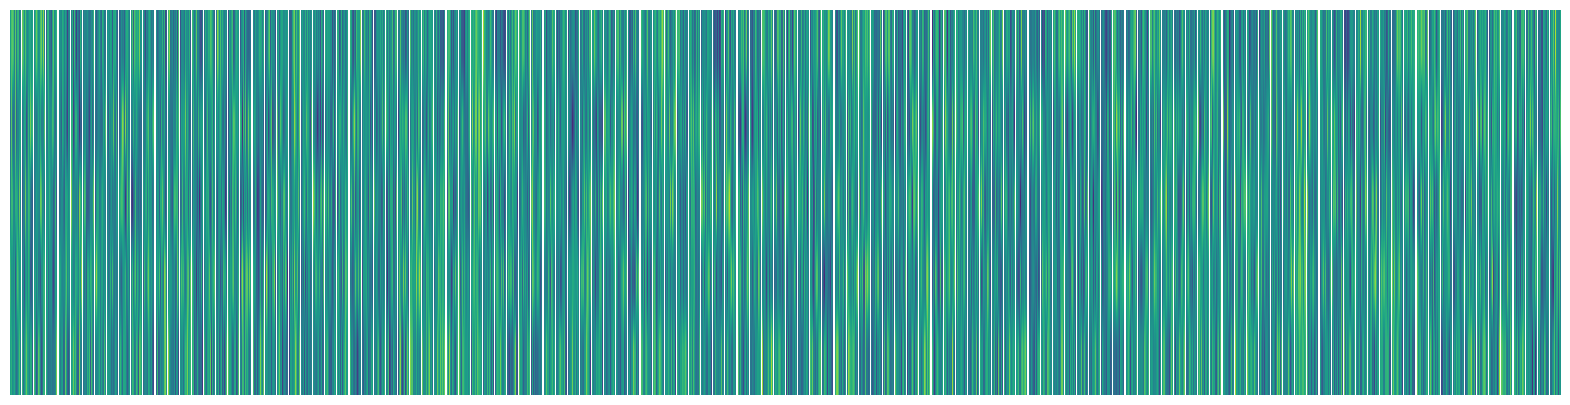

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming cnn_model is your trained model
# Ensure the cnn_model is called with input data
x_train = np.random.rand(10, 20, 25000).astype(np.float32)  # Dummy data for demonstration
cnn_model.predict(x_train[:1])

def visualize_filters(model, layer_name):
    """
    Visualize the filters of a convolutional layer.
    
    Parameters:
    model (tensorflow.keras.Model): The trained model.
    layer_name (str): The name of the convolutional layer.
    """
    layer = model.get_layer(name=layer_name)
    filters, biases = layer.get_weights()
    
    # Normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    n_filters = filters.shape[-1]
    fig, axes = plt.subplots(1, n_filters, figsize=(20, 5))
    
    for i in range(n_filters):
        f = filters[:, :, i]
        axes[i].imshow(f, aspect='auto', cmap='viridis')
        axes[i].axis('off')
    
    plt.show()

# Get the names of the convolutional layers
conv_layer_names = [layer.name for layer in cnn_model.layers if isinstance(layer, tf.keras.layers.Conv1D)]

# Visualize the filters for each convolutional layer
for layer_name in conv_layer_names:
    print(f"Visualizing filters for layer: {layer_name}")
    visualize_filters(cnn_model, layer_name)

visualize individual mfcc file

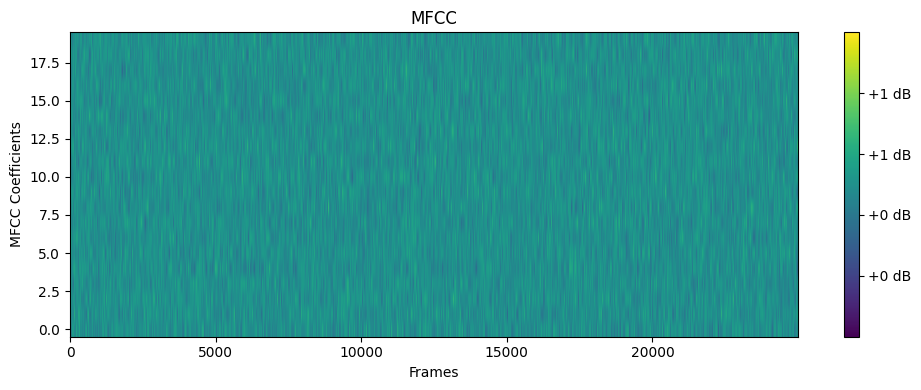

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming mfcc is your MFCC data with shape (num_samples, num_mfcc, num_frames)
# For example, let's create a dummy MFCC array for demonstration

mfcc = x_train[:1]

# Visualize the MFCCs for a single sample
def visualize_mfcc(mfcc, sample_index=0):
    """
    Visualize the MFCCs for a single sample.
    
    Parameters:
    mfcc (numpy.ndarray): The MFCC data with shape (num_samples, num_mfcc, num_frames).
    sample_index (int): The index of the sample to visualize.
    """
    mfcc_sample = mfcc[sample_index]
    
    plt.figure(figsize=(10, 4))
    plt.imshow(mfcc_sample, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.xlabel('Frames')
    plt.ylabel('MFCC Coefficients')
    plt.tight_layout()
    plt.show()

# Visualize the MFCCs for the first sample
visualize_mfcc(mfcc, sample_index=0)